In [0]:
import pandas as pd
import numpy as np
import time, warnings
import datetime as dt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

#modules for predictive models
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
warnings.filterwarnings("ignore")

#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [0]:
import random

In [0]:
df = pd.read_csv('/content/Online_data.csv')

In [0]:
df.count()

InvoiceNo           396402
ItemID              396402
Item_Description    396402
Quantity            396402
InvoiceDate         396402
UnitPrice           396402
CustomerID          396402
Country             396402
Review              396402
Total               396402
dtype: int64

In [0]:
df.shape

(396402, 10)

In [0]:
def review_generate(how_many):
  review = []
  for _ in range(0,how_many):
    review.append(random.randint(0,5))
  return review

In [0]:
review = []
for i in review_generate(396402):
    review.append(i)
review
df['Review'] = review


[4,
 4,
 1,
 0,
 3,
 4,
 0,
 4,
 4,
 1,
 2,
 5,
 2,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 1,
 2,
 4,
 2,
 1,
 2,
 5,
 3,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 5,
 5,
 4,
 5,
 3,
 4,
 2,
 2,
 0,
 5,
 4,
 0,
 1,
 3,
 3,
 0,
 3,
 2,
 3,
 4,
 3,
 5,
 5,
 4,
 3,
 5,
 2,
 1,
 4,
 0,
 0,
 3,
 3,
 1,
 2,
 2,
 5,
 0,
 0,
 3,
 4,
 0,
 3,
 3,
 0,
 1,
 1,
 0,
 4,
 0,
 2,
 5,
 0,
 0,
 0,
 2,
 1,
 4,
 3,
 5,
 4,
 1,
 4,
 3,
 1,
 3,
 5,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 2,
 0,
 0,
 3,
 0,
 5,
 3,
 5,
 3,
 4,
 5,
 1,
 4,
 2,
 5,
 0,
 3,
 5,
 2,
 0,
 0,
 5,
 1,
 2,
 1,
 2,
 3,
 5,
 0,
 5,
 2,
 5,
 5,
 0,
 3,
 0,
 3,
 2,
 5,
 5,
 0,
 4,
 0,
 3,
 1,
 5,
 1,
 1,
 1,
 0,
 2,
 3,
 1,
 4,
 1,
 5,
 2,
 2,
 4,
 4,
 5,
 1,
 5,
 0,
 4,
 2,
 2,
 3,
 4,
 0,
 4,
 5,
 4,
 2,
 3,
 1,
 3,
 0,
 4,
 1,
 0,
 4,
 0,
 4,
 5,
 5,
 5,
 0,
 0,
 0,
 2,
 2,
 1,
 3,
 1,
 4,
 1,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 1,
 2,
 4,
 0,
 1,
 2,
 5,
 5,
 2,
 5,
 5,
 0,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 3,
 0,
 4,
 5,
 5,
 4,
 5,
 1,
 5,
 2,
 3,
 5,
 1,
 2,
 1,


In [0]:
df.dtypes

InvoiceNo             int64
ItemID               object
Item_Description     object
Quantity              int64
InvoiceDate          object
UnitPrice           float64
CustomerID            int64
Country              object
Review                int64
Total               float64
dtype: object

In [0]:
df['InvoiceDate'] = df['InvoiceDate'].mask(df['InvoiceDate'].dt.year == 2010, df['InvoiceDate'] + 
                                                         pd.to_timedelta(8, unit='y') + 
                                                         pd.to_timedelta(12, unit='h'))

AttributeError: ignored

In [0]:
df['Total'] = df['Quantity'] * df['UnitPrice'] 
df.head()

,InvoiceNo,ItemID,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Review,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/2/2018 6:59,2.55,17850,United Kingdom,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/2/2018 6:59,3.39,17850,United Kingdom,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/2/2018 6:59,2.75,17850,United Kingdom,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/2/2018 6:59,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/2/2018 6:59,3.39,17850,United Kingdom,3,20.34


In [0]:
df = df.rename(columns = {'StockCode' : 'ItemID','Description':'Item_Description'})
df.head()

,InvoiceNo,ItemID,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Review,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/2/2018 6:59,2.55,17850,United Kingdom,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/2/2018 6:59,3.39,17850,United Kingdom,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/2/2018 6:59,2.75,17850,United Kingdom,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/2/2018 6:59,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/2/2018 6:59,3.39,17850,United Kingdom,3,20.34


In [0]:
df = df[df['Item_Description'].str.isalpha() == False]

In [0]:
df = df[df['CustomerID'].isnull() == False]

In [0]:
df = df[df['Total'] > 0.0]

In [0]:
df.count()

InvoiceNo           396368
ItemID              396368
Item_Description    396368
Quantity            396368
InvoiceDate         396368
UnitPrice           396368
CustomerID          396368
Country             396368
Review              396368
Total               396368
dtype: int64

In [0]:
df.to_csv("Online_clean_data_new.csv", index=False)

## Sort the customers based on amount they spend

In [0]:
arrange_customer = df.groupby(['CustomerID'])['Total'].sum()

In [0]:
def topCustomers(customer):
    top_customer = arrange_customer.sort_values(ascending=False)
    top10 = top_customer.head(10)
    return top10

In [0]:
def bottomCustomers(customer):
    bottom_customer = arrange_customer.sort_values(ascending=True)
    bottom10 = bottom_customer.head(10)
    return bottom10

In [0]:
topCustomers(arrange_customer)

CustomerID
14646    279138.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    136275.72
12415    124564.53
14156    116729.63
17511     91062.38
12346     77183.60
16029     72882.09
Name: Total, dtype: float64

In [0]:
bottomCustomers(arrange_customer)

CustomerID
16738.0     3.75
16454.0     5.90
14792.0     6.20
17956.0    12.75
16878.0    13.30
15823.0    15.00
17763.0    15.00
13307.0    15.00
16093.0    17.00
16953.0    20.80
Name: Total, dtype: float64

## Customer Segmentation

In [0]:
retail_df = df
retail_df.head()

,InvoiceNo,ItemID,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Review,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-12-01 18:59:36,2.55,17850.0,United Kingdom,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-12-01 18:59:36,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-12-01 18:59:36,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-12-01 18:59:36,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-12-01 18:59:36,3.39,17850.0,United Kingdom,5,20.34


In [0]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM
retail_df = retail_df[retail_df['InvoiceDate']>= "2018-12-09"]
retail_df.shape

(384391, 10)

In [0]:
print("Summary..")
#exploring the unique values of each attribute
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products bought: ",retail_df['ItemID'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )

Summary..
Number of transactions:  17780
Number of products bought:  3631
Number of customers: 4276
Percentage of customers NA:  0.0 %


### Recency

In [0]:
retail_df['InvoiceDate'].max()

Timestamp('2019-12-09 23:23:36')

In [0]:
now = dt.date(2019,12,9)
print(now)

2019-12-09


In [0]:
#create a new column called date which contains the date of invoice only
retail_df['date'] = retail_df['InvoiceDate'].dt.date

In [0]:
retail_df.head()

,InvoiceNo,ItemID,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Review,Total,date
18236,537809,85067,CREAM SWEETHEART WALL CABINET,1,2018-12-09 00:01:36,18.95,14217.0,United Kingdom,2,18.95,2018-12-09
18237,537809,22624,IVORY KITCHEN SCALES,2,2018-12-09 00:01:36,8.50,14217.0,United Kingdom,5,17.00,2018-12-09
18238,537809,21407,BROWN CHECK CAT DOORSTOP,3,2018-12-09 00:01:36,4.25,14217.0,United Kingdom,0,12.75,2018-12-09
18239,537809,21624,VINTAGE UNION JACK DOORSTOP,3,2018-12-09 00:01:36,5.95,14217.0,United Kingdom,0,17.85,2018-12-09
18240,537809,22508,DOORSTOP RETROSPOT HEART,4,2018-12-09 00:01:36,3.75,14217.0,United Kingdom,1,15.00,2018-12-09


In [0]:
#group by customers and check last date of purshace
recency_df = retail_df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2019-01-18
1,12347.0,2019-12-08
2,12348.0,2019-09-25
3,12349.0,2019-11-21
4,12350.0,2019-02-03


In [0]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [0]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2019-01-18,325
1,12347.0,2019-12-08,1
2,12348.0,2019-09-25,75
3,12349.0,2019-11-21,18
4,12350.0,2019-02-03,309


In [0]:
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

### Frequency

In [0]:
# drop duplicates
retail_df_copy = retail_df
retail_df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,6
2,12348.0,4
3,12349.0,1
4,12350.0,1


### Monetary

In [0]:
#create column total cost
retail_df['TotalCost'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [0]:
monetary_df = retail_df.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,137.96
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


In [0]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,1,6
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,309,1


In [0]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,6,137.96
12348.0,75,4,331.36
12349.0,18,1,15.00
12350.0,309,1,25.20


In [0]:
#get the 80% of the revenue
pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  958931.08


In [0]:
customers_rank = rfm_df
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12346.0,325,1,77183.60,2.0
12347.0,1,6,137.96,974.0
12348.0,75,4,331.36,407.0
12349.0,18,1,15.00,3460.0
12350.0,309,1,25.20,2817.5


In [0]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
16446.0,0,2,168471.25,1.0
12346.0,325,1,77183.60,2.0
15098.0,181,3,39916.50,3.0
18102.0,0,57,39646.45,4.0
17949.0,0,43,28205.69,5.0
...,...,...,...,...
17201.0,53,1,0.65,4271.0
14041.0,266,1,0.58,4273.0
15503.0,362,1,0.42,4274.0


### RFM Quartiles

In [0]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,Rank
0.25,17.0,1.0,17.700,1069.625
0.50,49.0,2.0,45.480,2138.250
0.75,133.0,4.0,123.085,3192.500


In [0]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 49.0, 0.75: 133.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 45.48, 0.75: 123.08500000000001},
 'Rank': {0.25: 1069.625, 0.5: 2138.25, 0.75: 3192.5}}

In [0]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [0]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [0]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4
12347.0,1,6,137.96,974.0,4,4,4
12348.0,75,4,331.36,407.0,2,3,4
12349.0,18,1,15.00,3460.0,3,1,1
12350.0,309,1,25.20,2817.5,1,1,2


In [0]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()


,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114
12347.0,1,6,137.96,974.0,4,4,4,444
12348.0,75,4,331.36,407.0,2,3,4,234
12349.0,18,1,15.00,3460.0,3,1,1,311
12350.0,309,1,25.20,2817.5,1,1,2,112


In [0]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  429
Loyal Customers:  1066
Big Spenders:  1069
Almost Lost:  89
Lost Customers:  13
Lost Cheap Customers:  411


In [0]:
best_customer = rfm_segmentation[rfm_segmentation['RFMScore']=='444']
best_customer

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12347.0,1,6,137.96,974.0,4,4,4,444
12362.0,2,10,215.13,633.0,4,4,4,444
12388.0,15,6,140.52,957.0,4,4,4,444
12417.0,2,9,141.40,954.0,4,4,4,444
12433.0,0,6,177.96,764.0,4,4,4,444
...,...,...,...,...,...,...,...,...
18225.0,2,12,295.11,467.0,4,4,4,444
18229.0,11,18,1367.56,106.0,4,4,4,444
18230.0,9,7,279.72,502.0,4,4,4,444


In [0]:
loyal_customer = rfm_segmentation[rfm_segmentation['F_Quartile']==4]
loyal_customer

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12347.0,1,6,137.96,974.0,4,4,4,444
12352.0,35,7,135.30,996.0,3,4,4,344
12362.0,2,10,215.13,633.0,4,4,4,444
12383.0,184,5,102.40,1232.0,1,4,3,143
12388.0,15,6,140.52,957.0,4,4,4,444
...,...,...,...,...,...,...,...,...
18245.0,6,7,132.86,1013.0,4,4,4,444
18257.0,38,8,153.43,884.0,3,4,4,344
18260.0,172,6,150.57,895.0,1,4,4,144


In [0]:
big_spendor = rfm_segmentation[rfm_segmentation['M_Quartile']==4]
big_spendor

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114
12347.0,1,6,137.96,974.0,4,4,4,444
12348.0,75,4,331.36,407.0,2,3,4,234
12352.0,35,7,135.30,996.0,3,4,4,344
12356.0,22,3,153.90,880.0,3,3,4,334
...,...,...,...,...,...,...,...,...
18246.0,23,2,407.40,338.0,3,2,4,324
18251.0,86,1,252.00,544.0,2,1,4,214
18257.0,38,8,153.43,884.0,3,4,4,344


In [0]:
almost_lost = rfm_segmentation[rfm_segmentation['RFMScore']=='244']
almost_lost

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12457.0,66,6,793.00,175.0,2,4,4,244
12502.0,95,5,299.90,457.0,2,4,4,244
12637.0,66,8,190.07,718.0,2,4,4,244
12643.0,128,6,1383.06,103.0,2,4,4,244
12823.0,74,5,1759.50,79.0,2,4,4,244
...,...,...,...,...,...,...,...,...
17894.0,71,8,183.74,738.0,2,4,4,244
18008.0,69,9,1833.84,71.0,2,4,4,244
18073.0,113,12,1724.10,84.0,2,4,4,244


In [0]:
lost_customer = rfm_segmentation[rfm_segmentation['RFMScore']=='144']
lost_customer

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12601.0,189,5,178.20,761.5,1,4,4,144
12853.0,134,6,202.20,679.0,1,4,4,144
12947.0,143,5,229.10,596.0,1,4,4,144
12980.0,157,9,3065.34,53.0,1,4,4,144
13093.0,275,7,592.90,226.0,1,4,4,144
15235.0,217,10,155.10,876.0,1,4,4,144
15379.0,169,7,170.20,804.0,1,4,4,144
16553.0,162,12,1075.86,128.0,1,4,4,144
16919.0,155,10,200.40,684.0,1,4,4,144


In [0]:
lost_cheap_customer = rfm_segmentation[rfm_segmentation['RFMScore']=='111']
lost_cheap_customer

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12365.0,290,1,15.00,3460.0,1,1,1,111
12405.0,148,1,12.48,3644.5,1,1,1,111
12426.0,194,1,17.70,3192.5,1,1,1,111
12461.0,154,1,13.52,3573.5,1,1,1,111
12501.0,336,1,8.50,3855.5,1,1,1,111
...,...,...,...,...,...,...,...,...
18224.0,263,1,10.20,3742.0,1,1,1,111
18227.0,217,1,15.00,3460.0,1,1,1,111
18250.0,310,1,14.85,3524.5,1,1,1,111


In [0]:
a=len(rfm_segmentation[rfm_segmentation['RFMScore']=='444'])
b=len(rfm_segmentation[rfm_segmentation['F_Quartile']==4])
c=len(rfm_segmentation[rfm_segmentation['M_Quartile']==4])
d=len(rfm_segmentation[rfm_segmentation['RFMScore']=='244'])
e=len(rfm_segmentation[rfm_segmentation['RFMScore']=='144'])
f=len(rfm_segmentation[rfm_segmentation['RFMScore']=='111'])

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x16acff15108>,
 <a list of 6 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Customers based shopping habbits')

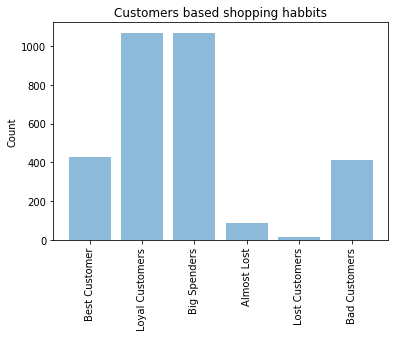

In [0]:
RFM = ('Best Customer', 'Loyal Customers','Big Spenders','Almost Lost', 'Lost Customers', 'Bad Customers')
y_pos = np.arange(len(RFM))
performance = [a,b,c,d,e,f]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, RFM, rotation='vertical')
plt.ylabel('Count')
plt.title('Customers based shopping habbits')

plt.show()

In [0]:
best_customer_comp.to_csv("C:/Users/yashr/OneDrive/Desktop/best_customer.csv", index=False)
loyal_customer_comp.to_csv("C:/Users/yashr/OneDrive/Desktop/loyal_customer.csv", index=False)
big_spendor_comp.to_csv("C:/Users/yashr/OneDrive/Desktop/big_spendor.csv", index=False)
almost_lost_comp.to_csv("C:/Users/yashr/OneDrive/Desktop/almost_lost.csv", index=False)
lost_customer_comp.to_csv("C:/Users/yashr/OneDrive/Desktop/lost_customer.csv", index=False)
lost_cheap_customer_comp.to_csv("C:/Users/yashr/OneDrive/Desktop/lost_cheap_customer.csv", index=False)

In [0]:
best_customer_comp = best_customer.merge(df,on='CustomerID')
best_customer_comp = best_customer_comp.drop(columns=['Recency','Frequency','Monetary','R_Quartile','F_Quartile','M_Quartile','RFMScore'])

In [0]:
loyal_customer_comp = loyal_customer.merge(df,on='CustomerID')
loyal_customer_comp = loyal_customer_comp.drop(columns=['Recency','Frequency','Monetary','R_Quartile','F_Quartile','M_Quartile','RFMScore'])

In [0]:
big_spendor_comp = big_spendor.merge(df,on='CustomerID')
big_spendor_comp = big_spendor_comp.drop(columns=['Recency','Frequency','Monetary','R_Quartile','F_Quartile','M_Quartile','RFMScore'])

In [0]:
almost_lost_comp = almost_lost.merge(df,on='CustomerID')
almost_lost_comp = almost_lost_comp.drop(columns=['Recency','Frequency','Monetary','R_Quartile','F_Quartile','M_Quartile','RFMScore'])

In [0]:
lost_customer_comp = lost_customer.merge(df,on='CustomerID')
lost_customer_comp = lost_customer_comp.drop(columns=['Recency','Frequency','Monetary','R_Quartile','F_Quartile','M_Quartile','RFMScore'])

In [0]:
lost_cheap_customer_comp = lost_cheap_customer.merge(df,on='CustomerID')
lost_cheap_customer_comp = lost_cheap_customer_comp.drop(columns=['Recency','Frequency','Monetary','R_Quartile','F_Quartile','M_Quartile','RFMScore'])

## Customer Lifetime Value

In [0]:
data_group=df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                                 'InvoiceNo': lambda num: len(num),
                                                 'Quantity': lambda quant: quant.sum(),
                                                 'Total': lambda price: price.sum()})


In [0]:
data_group.head()

,InvoiceDate,InvoiceNo,Quantity,Total
CustomerID,,,,
12346.0,0,1,74215,77183.60
12347.0,365,182,2458,4310.00
12348.0,282,27,2332,1437.24
12349.0,0,72,630,1457.55
12350.0,0,16,196,294.40


In [0]:
data_group.columns=['num_days','num_transactions','num_units','spent_money']
data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12347.0,365,182,2458,4310.00
12348.0,282,27,2332,1437.24
12349.0,0,72,630,1457.55
12350.0,0,16,196,294.40


In [0]:
data_group['avg_order_value']=data_group['spent_money']/data_group['num_transactions']

In [0]:
purchase_frequency=sum(data_group['num_transactions'])/data_group.shape[0]

In [0]:
# Repeat Rate
repeat_rate=data_group[data_group.num_transactions > 1].shape[0]/data_group.shape[0]
#Churn Rate
churn_rate=1-repeat_rate

In [0]:
data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12347.0,365,182,2458,4310.00,23.681319
12348.0,282,27,2332,1437.24,53.231111
12349.0,0,72,630,1457.55,20.243750
12350.0,0,16,196,294.40,18.400000


In [0]:
purchase_frequency,repeat_rate,churn_rate

(91.43437139561708, 0.9829296424452134, 0.017070357554786586)

In [0]:
data_group.dtypes

num_days              int64
num_transactions      int64
num_units             int64
spent_money         float64
avg_order_value     float64
dtype: object

In [0]:
# Profit Margin
data_group['profit_margin']=data_group['spent_money'].astype('float') *0.05

In [0]:
# Customer Value
data_group['CLV']=(data_group['avg_order_value'].astype('float')*purchase_frequency)/churn_rate
#Customer Lifetime Value
data_group['cust_lifetime_value']=data_group['CLV'].astype('float')*data_group['profit_margin'].astype('float')
data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,4.134204e+08,1.595464e+12
12347.0,365,182,2458,4310.00,23.681319,215.5000,1.268448e+05,2.733506e+07
12348.0,282,27,2332,1437.24,53.231111,71.8620,2.851231e+05,2.048952e+07
12349.0,0,72,630,1457.55,20.243750,72.8775,1.084321e+05,7.902260e+06
12350.0,0,16,196,294.40,18.400000,14.7200,9.855637e+04,1.450750e+06


In [0]:
data_group.to_csv("C:/Users/yashr/OneDrive/Desktop/customerlifetime.csv", index=False)


## Churn Rate

In [0]:
import datetime as dt
df1 = df
# extract year, month and day 
df1['InvoiceDate'] = df1.InvoiceDate.apply(lambda x: dt.datetime(x.year, x.month, x.day))
df1.head()

,InvoiceNo,ItemID,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Review,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-12-01,2.55,17850.0,United Kingdom,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-12-01,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-12-01,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-12-01,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-12-01,3.39,17850.0,United Kingdom,5,20.34


In [0]:
monthly_unique_customers_df = df1.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2018-12-31     885
2019-01-31     726
2019-02-28     753
2019-03-31     965
2019-04-30     869
2019-05-31    1038
2019-06-30     983
2019-07-31     952
2019-08-31     934
2019-09-30    1260
2019-10-31    1363
2019-11-30    1649
2019-12-31     643
Freq: M, Name: CustomerID, dtype: int64

In [0]:
pd.DataFrame(monthly_unique_customers_df)['InvoiceDate']=pd.DataFrame(monthly_unique_customers_df).index


In [0]:
df2 = pd.DataFrame(monthly_unique_customers_df).reset_index()
df2["CustomerIDshift"] = [0]+list(df2["CustomerID"][:-1])
df2["ChurnRate"] = (df2["CustomerIDshift"]-df2["CustomerID"])/df2["CustomerIDshift"]
df2.rename(columns={'InvoiceDay': 'Month'}, inplace=True)
df2['ChurnRate'][0]=1
df2['ChurnRate']

data2 = df2.drop(columns=['CustomerID','CustomerIDshift'])
data2

0     1.000000
1     0.179661
2    -0.037190
3    -0.281541
4     0.099482
5    -0.194476
6     0.052987
7     0.031536
8     0.018908
9    -0.349036
10   -0.081746
11   -0.209831
12    0.610067
Name: ChurnRate, dtype: float64

,InvoiceDate,ChurnRate
0,2018-12-31,1.000000
1,2019-01-31,0.179661
2,2019-02-28,-0.037190
3,2019-03-31,-0.281541
4,2019-04-30,0.099482
5,2019-05-31,-0.194476
6,2019-06-30,0.052987
7,2019-07-31,0.031536
8,2019-08-31,0.018908
9,2019-09-30,-0.349036


In [0]:
data2.to_csv("C:/Users/yashr/OneDrive/Desktop/churnrate.csv", index=False)


**bold text**## Collabrative Filtering Recommendation for the Loyal Customers

In [0]:
loyal_customer_rec = df
loyal_customer_rec = loyal_customer_rec.drop(columns=['InvoiceNo','Item_Description','Quantity','InvoiceDate','UnitPrice','Country','Total'])
loyal_customer_rec.head()

,ItemID,CustomerID,Review
0,85123A,17850,4
1,71053,17850,4
2,84406B,17850,1
3,84029G,17850,0
4,84029E,17850,3


In [0]:
loyal_customer_rec.count()

ItemID        396368
CustomerID    396368
Review        396368
dtype: int64

In [0]:
loyal_customer_rec.dtypes

ItemID        object
CustomerID     int64
Review         int64
dtype: object

In [0]:
loyal_customer_rec['Review'].describe().transpose()

count    396368.000000
mean          2.502816
std           1.708954
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Review, dtype: float64

In [0]:
print('Minimum rating is: %d' %(loyal_customer_rec.Review.min()))
print('Maximum rating is: %d' %(loyal_customer_rec.Review.max()))

Minimum rating is: 0
Maximum rating is: 5


In [0]:
print('Number of missing values across columns: \n',loyal_customer_rec.isnull().sum())

Number of missing values across columns: 
 ItemID        0
CustomerID    0
Review        0
dtype: int64


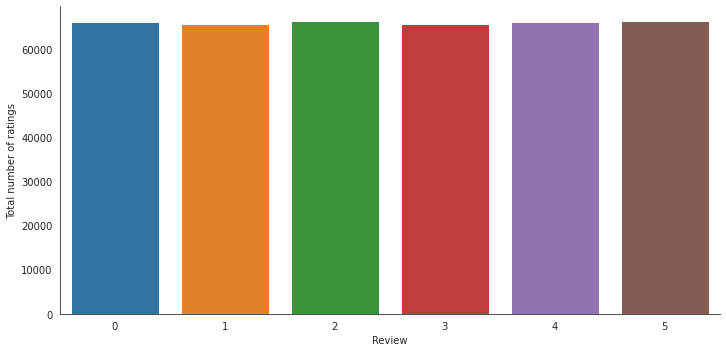

In [0]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("Review", data=loyal_customer_rec, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [0]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', loyal_customer_rec['CustomerID'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', loyal_customer_rec['ItemID'].nunique())

Number of unique users in Raw data =  4335
Number of unique product in Raw data =  3662


In [0]:
#Check the top 10 users based on ratings
most_rated=loyal_customer_rec.groupby('CustomerID').size().sort_values(ascending=False)
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 CustomerID
17841    7838
14911    5589
14096    5111
12748    4580
14606    2698
         ... 
13747       1
12814       1
16953       1
12791       1
12346       1
Length: 4335, dtype: int64


In [0]:
counts=loyal_customer_rec.CustomerID.value_counts()
loyal_customer_rec_final=loyal_customer_rec[loyal_customer_rec.CustomerID.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(loyal_customer_rec_final))
print('Number of unique users in the final data = ', loyal_customer_rec_final['CustomerID'].nunique())
print('Number of unique products in the final data = ', loyal_customer_rec_final['ItemID'].nunique())

Number of users who have rated 25 or more items = 389287
Number of unique users in the final data =  3409
Number of unique products in the final data =  3652


In [0]:
#constructing the pivot table
final_ratings_matrix = loyal_customer_rec_final.pivot(index = 'CustomerID', columns ='ItemID', values = 'Review')
final_ratings_matrix.head()

ValueError: ignored

In [0]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(loyal_customer_rec_final, test_size = 0.3, random_state=0)
train_data.head()

,ItemID,CustomerID,Review
29140,20727,12947,3
312344,82494L,15376,4
51476,84987,13334,3
327188,23194,13599,0
39629,22131,15235,3


In [0]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (272500, 3)
Shape of testing data:  (116787, 3)


In [0]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('ItemID').agg({'CustomerID': 'count'}).reset_index()
train_data_grouped.rename(columns = {'CustomerID': 'score'},inplace=True)
train_data_grouped.head(40)

,ItemID,score
0,10002,40
1,10080,15
2,10120,18
3,10123C,2
4,10124A,3
5,10124G,4
6,10125,47
7,10133,75
8,10135,83
9,11001,45


In [0]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'ItemID'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,ItemID,score,rank
3184,85123A,1395,1.0
1275,22423,1196,2.0
3171,85099B,1086,3.0
3012,84879,944,4.0
2567,47566,918,5.0


In [0]:
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['CuetomerID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [0]:
find_recom = [12383.0,12347.0,12348.0]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId: 12383

      CuetomerID  ItemID  score  rank
3184     12383.0  85123A   1395   1.0
1275     12383.0   22423   1196   2.0
3171     12383.0  85099B   1086   3.0
3012     12383.0   84879    944   4.0
2567     12383.0   47566    918   5.0


The list of recommendations for the userId: 12347

      CuetomerID  ItemID  score  rank
3184     12347.0  85123A   1395   1.0
1275     12347.0   22423   1196   2.0
3171     12347.0  85099B   1086   3.0
3012     12347.0   84879    944   4.0
2567     12347.0   47566    918   5.0


The list of recommendations for the userId: 12348

      CuetomerID  ItemID  score  rank
3184     12348.0  85123A   1395   1.0
1275     12348.0   22423   1196   2.0
3171     12348.0  85099B   1086   3.0
3012     12348.0   84879    944   4.0
2567     12348.0   47566    918   5.0




In [0]:
from keras.models import load_model

Using TensorFlow backend.


In [0]:
recommend.save('ci360')

AttributeError: ignored

In [0]:
electronics_df_CF = pd.concat([train_data, test_data]).reset_index()
electronics_df_CF.head()

,index,ItemID,CustomerID,Review
0,29140,20727,12947,4
1,312344,82494L,15376,1
2,51476,84987,13334,3
3,327188,23194,13599,4
4,39629,22131,15235,4


In [0]:
pivot_df =pd.pivot_table(electronics_df_CF, values='Review',
                                    index=['CustomerID'], columns=['ItemID'])
pivot_df.head()


ItemID,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,...,90206C,90208,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,DOT,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (3409, 3652)


In [0]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df

ItemID,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,...,90208,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,DOT,PADS,user_index
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
12350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
12352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3404
18265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3405
18272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3406


In [0]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

ItemID,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16010,16011,16012,16014,16015,16016,16020C,16033,16043,16045,16046,16048,16049,16052,...,90206C,90208,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,DOT,PADS
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [0]:
print('Left singular matrix: \n',U)


Left singular matrix: 
 [[-0.00785928 -0.01156559  0.00821682 ...  0.01444762 -0.00123096
   0.04207375]
 [-0.01084012 -0.0121884   0.00222785 ...  0.0034858   0.0022279
   0.01043442]
 [ 0.01327685  0.02590896 -0.02487316 ...  0.01874487 -0.00505249
  -0.01975116]
 ...
 [-0.00073438 -0.02081188  0.00531357 ...  0.00999853  0.02024359
  -0.00719004]
 [-0.01427815  0.00532533  0.00233512 ... -0.02054204 -0.01406725
   0.01250721]
 [-0.02082752 -0.02448047 -0.01749396 ... -0.02112436 -0.00299653
   0.01322959]]


In [0]:
print('Sigma: \n',sigma)


Sigma: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
print('Right singular matrix: \n',Vt)


Right singular matrix: 
 [[ 0.00715356  0.00303054 -0.01116423 ... -0.01009444 -0.01090971
   0.00017357]
 [-0.00938444  0.01821605 -0.02428621 ...  0.00688921 -0.00744051
   0.02941164]
 [-0.02404156 -0.00785546 -0.02539395 ...  0.01294196 -0.01895686
  -0.04164165]
 ...
 [-0.0224348   0.015599   -0.0047953  ...  0.00578264  0.004296
  -0.01363821]
 [-0.00123924  0.00106052 -0.00650091 ... -0.01693511  0.01864182
  -0.01222536]
 [-0.0019476   0.00973995  0.01234825 ... -0.02112636  0.00554176
   0.00732624]]


In [0]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

ItemID,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214L,90214M,90214N,90214P,90214R,90214S,90214V,90214Y,BANK CHARGES,DOT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
customer_id = electronics_df_CF['CustomerID'].unique()
customer_id = np.sort(customer_id)
customer_id

array([12347., 12352., 12362., ..., 18260., 18272., 18283.])

In [0]:
def customer_index(user_id):
    count = 0
    for i in customer_id:
        count = count + 1
        if (i == user_id):
           return count              
    return 0

In [0]:
userID = customer_index(18283.0)

In [0]:
def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    array = temp.index
    recommendation = pd.DataFrame(array[:5])
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(recommendation)

In [0]:
recommend_items(userID, pivot_df, preds_df, 5)


Below are the recommended items for user(user_id = 1054):

  Recommended Items
0             21240
1             21319
2             21614
3             21717
4             21868
